# Today's date - 19 June 2023
# Topic - Regularization

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

#Initalizing the data

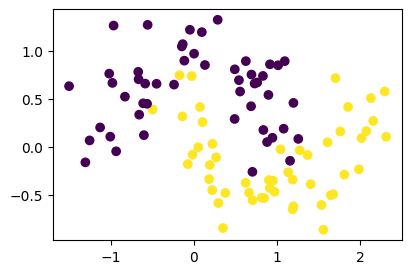

In [9]:
X, y = make_moons(100, noise=0.25,random_state=2)
plt.figure(figsize=(4.5,3))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Showing that in large number of epochs, it will overfit

In [10]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

5469/5469 [==============================] - 7s 1ms/step


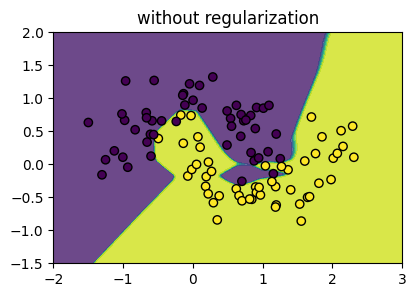

In [12]:
#Plotting decision boundary
step_size = 0.01
x_min, x_max = -2, 3
y_min, y_max = -1.5, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))

Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(4.5,3))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('without regularization')
plt.show()

You can clearly see, how hard it is trying to overfit the data ☝️☝️

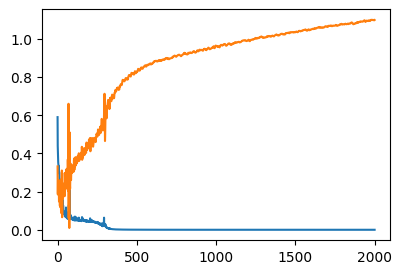

In [13]:
plt.figure(figsize=(4.5,3))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

Also by looking at this graph, you can tell how the data overfits horribly ☝️☝️

# Using L2 regularization

In [24]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.033)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [25]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

5469/5469 [==============================] - 9s 2ms/step


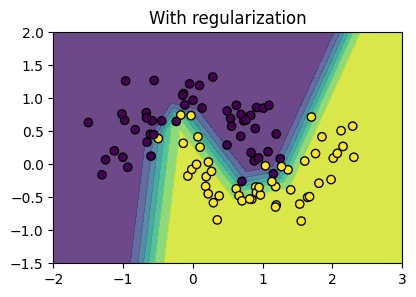

In [39]:
#Plotting decision boundary
step_size = 0.01
x_min, x_max = -2, 3
y_min, y_max = -1.5, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(4.5,3))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('With regularization')
plt.show()

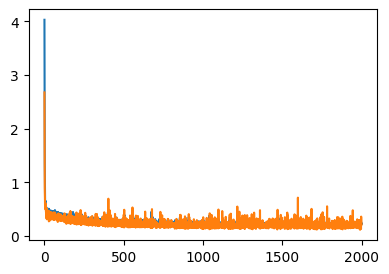

In [27]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

By looking at decision bounday and loss graph, we can see regularization has solved overfitting ☝️☝️

# As regularization reduces the value of weights close to 0, lets take a look at value of weghits

In [28]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

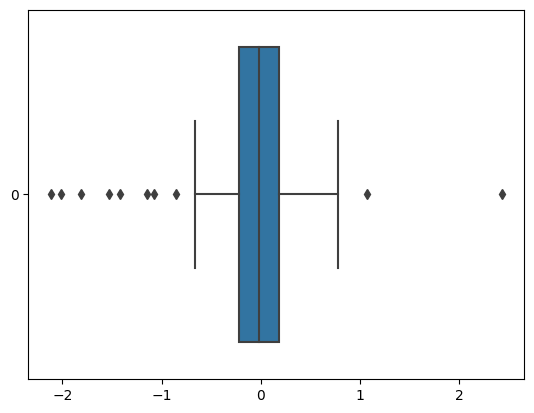

In [36]:
sns.boxplot(model1_weight_layer1, orient='h')

In this box plot, we can see weights is distrubuted ☝️☝️

<Axes: >

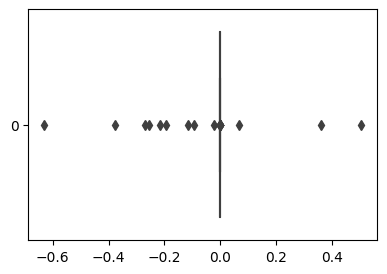

In [37]:
plt.figure(figsize=(4.5,3))
sns.boxplot(model2_weight_layer1, orient='h')

In regularized model, almost all weights are close to 0 ☝️☝️

In [31]:
model1_weight_layer1.min(), model1_weight_layer1.max()

(-2.1153316, 2.4307516)

In [32]:
model2_weight_layer1.min(), model2_weight_layer1.max()

(-0.62947255, 0.5038269)

Here was the min, max of weights of model 1 and model 2 ☝️☝️

<ipython-input-33-0aeb2e39017f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-33-0aeb2e39017f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

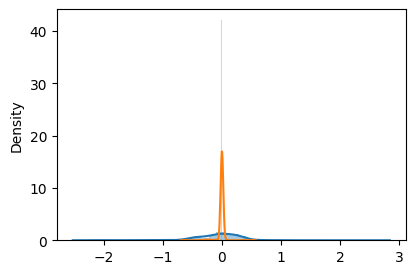

In [33]:
plt.figure(figsize=(4.5,3))
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In this distplot, we can clearly see model2 weights are close to 0 ☝️☝️